In [3]:
import pandas as pd
import numpy as np
import plotnine as p9
from scipy.stats import iqr

In [4]:
root_results_dir = "/projects/genomic-ml/da2343/ml_project_1/model_subsampling/results"

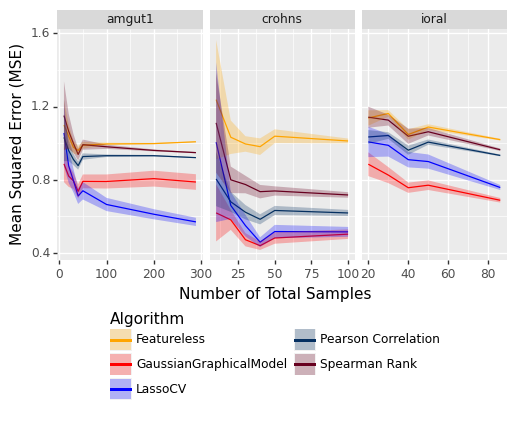

In [20]:



error_df1 = pd.read_csv(f"{root_results_dir}/2023-03-22_18:12_results.csv")
error_df2 = pd.read_csv(f"{root_results_dir}/2023-03-22_19:01_results.csv")
error_df = pd.concat([error_df1, error_df2], ignore_index=True)
# change where algorithm is GuassianGraphicalMethod to GaussianGraphicalModel
error_df.loc[error_df['Algorithm'] == 'GuassianGraphicalMethod', 'Algorithm'] = 'GaussianGraphicalModel'


colors = [ "orange", "red", "blue", "#053061", "#67001f"]

dataset_list = error_df["Dataset"].unique().tolist()
main_test_error_list = []
for dataset in dataset_list:
    test_error_df_list = []
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Total Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            std_mse = sub_filtered_csv['Mean Squared Error'].var() * 0.3
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            test_error_dict = {'# of Total Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            # 'R2 Score': mean_r2,
                            'ymin' : mse_min,
                            'ymax' : mse_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    # save the dataframe
    # remove the index column
    my_combined_results_df = my_combined_results_df.drop(columns=['index'])
    main_test_error_list.append(my_combined_results_df)
    
# combine all the dataframes
combined_results_df = pd.concat(main_test_error_list).reset_index()

# define the order of the facets
dataset_order = ['amgut1', 'crohns', 'ioral']
p9options.figure_size = (5.8, 3)
colors = ["orange", "red", "blue", "#053061", "#67001f"]

# Reorder the levels of the Dataset variable
combined_results_df['Dataset'] = pd.Categorical(combined_results_df['Dataset'], categories=dataset_order, ordered=True)
max_train_samples = combined_results_df.groupby('Dataset')['# of Total Samples'].max()

gg = p9.ggplot(combined_results_df) +\
p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('~Dataset', scales='free_x') +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(values=colors) +\
p9.scale_color_manual(values=colors) +\
p9.xlab("Number of Total Samples") +\
p9.ylab("Mean Squared Error (MSE)") +\
p9.theme(legend_position="bottom", legend_box_spacing=0.3)+\
p9.guides(fill=p9.guide_legend(ncol = 2)) 
# show the plot
print(gg)


In [ ]:
import plotnine as p9
import pandas as pd
import plotnine.options as p9options

error_df1 = pd.read_csv(f"{root_results_dir}/2023-04-10_15:31_results.csv")
error_df2 = pd.read_csv(f"{root_results_dir}/2023-04-10_17:47_results.csv")
error_df = pd.concat([error_df1, error_df2], ignore_index=True)
# change where algorithm is GuassianGraphicalMethod to GaussianGraphicalModel
error_df.loc[error_df['Algorithm'] == 'GaussianGraphicalModel', 'Algorithm'] = 'GGM'
error_df.loc[error_df['Algorithm'] == 'LassoCV', 'Algorithm'] = 'LASSO'
error_df.loc[error_df['Algorithm'] == 'Pearson Correlation', 'Algorithm'] = 'Pearson'
error_df.loc[error_df['Algorithm'] == 'Spearman Rank', 'Algorithm'] = 'Spearman'

colors = [ "orange", "red", "blue", "#053061", "#67001f"]

dataset_list = error_df["Dataset"].unique().tolist()
main_test_error_list = []
for dataset in dataset_list:
    test_error_df_list = []
    sub_dataset_df = error_df[error_df["Dataset"] == dataset]
    n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()
    
    for n_sample in n_samples_list:
        filtered_csv = sub_dataset_df[sub_dataset_df["# of Total Samples"] == n_sample]
        algo_list = filtered_csv["Algorithm"].unique().tolist()
        
        for algorithm in algo_list:
            sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
            mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
            std_mse = sub_filtered_csv['Mean Squared Error'].var() * 0.25
            mse_min = mean_mse - std_mse
            mse_max = mean_mse + std_mse
            
            test_error_dict = {'# of Total Samples': n_sample,
                            'Mean Squared Error': mean_mse,
                            # 'R2 Score': mean_r2,
                            'ymin' : mse_min,
                            'ymax' : mse_max,
                            'Dataset': dataset,
                            'Algorithm': algorithm,
                            }
            test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
    my_combined_results_df = pd.concat(test_error_df_list).reset_index()
    # save the dataframe
    # remove the index column
    my_combined_results_df = my_combined_results_df.drop(columns=['index'])
    main_test_error_list.append(my_combined_results_df)
    
# combine all the dataframes
combined_results_df = pd.concat(main_test_error_list).reset_index()
# combined_results_df = combined_results_df[combined_results_df['# of Total Samples'] <= 90]

# define the order of the facets
dataset_order = ['amgut1', 'crohns', 'ioral']
# p9options.figure_size = (7, 3)
# p9options.figure_size = (9, 3)

# Reorder the levels of the Dataset variable
combined_results_df['Dataset'] = pd.Categorical(combined_results_df['Dataset'], categories=dataset_order, ordered=True)

# save combined_results_df
# combined_results_df.to_csv(f"{root_results_dir}/combined_results_df.csv", index=False)

max_train_samples = combined_results_df.groupby('Dataset')['# of Total Samples'].max()

gg = p9.ggplot(combined_results_df) +\
p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('~Dataset',  labeller= 'label_both',scales='free_x' ) +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(values=colors) +\
p9.scale_color_manual(values=colors) +\
p9.xlab("Number of Total Samples") +\
p9.ylab("Mean Squared Error (MSE)") +\
p9.theme(legend_position="bottom", legend_box_spacing=0.3)+\
p9.guides(fill=p9.guide_legend(ncol = 2))+\
p9.scale_x_continuous(breaks=[10, 30, 80, 200, 289])
# show the plot
print(gg)
# save the plot as svg
# p9.ggsave(gg, filename=f"2023-04-10_17:47_results.png", dpi=700)


In [ ]:
colors = [ "orange", "#67001f", "#053061", "blue", "red" ]
# combined_results_df = combined_results_df[combined_results_df['# of Total Samples'] <= 90]
p9options.figure_size = (3.5, 7)
# p9options.figure_size = (4, 7)
#multiply ymin and ymax by 0.5
new_combined_results_df = combined_results_df.copy()
new_combined_results_df = new_combined_results_df[new_combined_results_df['# of Total Samples'] <= 90]

gg = p9.ggplot(new_combined_results_df) +\
p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
p9.facet_wrap('Dataset',  labeller= 'label_both', nrow = 3) +\
p9.geom_line( p9.aes(color = "Algorithm") ) +\
p9.geom_ribbon(alpha = 0.27) +\
p9.scale_fill_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors) +\
p9.scale_color_manual(breaks=["Featureless", "Spearman", "Pearson", "LASSO", "GGM"], values=colors) +\
p9.theme(
            axis_text=p9.element_text(size=0.8*11),
            legend_key=p9.element_rect(color='#CCCCCC'),
            panel_background=p9.element_rect(fill='white'),
            panel_border=p9.element_rect(fill='None', color='black'),
            panel_grid_major=p9.element_line(color='#E5E5E5', size=0.8),
            panel_grid_minor=p9.element_line(color='#FAFAFA', size=1),
            strip_background=p9.element_rect(
                fill='white',
                color='black',
                size=1
            )
) +\
p9.scale_x_continuous(breaks=[10, 20, 30, 40,50,60,70, 80, 90])+\
p9.xlab("Number of Total Samples") +\
p9.ylab("Mean Squared Error on Test Set")
   
# show the plot
print(gg)
# save the plot as svg
p9.ggsave(gg, filename=f"2023-04-10_17:47_results.png", dpi=900)

In [5]:
def test_error_graph(error_df):
    # Get unique values as list from column name `Dataset`
    dataset_list = error_df["Dataset"].unique().tolist()
    # colors = ["#000080", "#FF8000", "#800080", "#8B0000", "#D3D3D3"]
    colors = [ "orange", "red", "blue", "#053061", "#67001f"]
    
    
    
    for dataset in dataset_list:
        test_error_df_list = []
        # remove multi
        # Get new dataframe with only the dataset
        sub_dataset_df = error_df[error_df["Dataset"] == dataset]
        n_samples_list = sub_dataset_df["# of Total Samples"].unique().tolist()
        
        for n_sample in n_samples_list:
            filtered_csv = sub_dataset_df[sub_dataset_df["# of Total Samples"] == n_sample]
            algo_list = filtered_csv["Algorithm"].unique().tolist()
            
            for algorithm in algo_list:
                sub_filtered_csv = filtered_csv[filtered_csv["Algorithm"] == algorithm]
                # Get new dataframe with only the dataset and n_sample
                mean_mse = sub_filtered_csv['Mean Squared Error'].mean()
                std_mse = sub_filtered_csv['Mean Squared Error'].std() * 0.02
                mse_min = mean_mse - std_mse
                mse_max = mean_mse + std_mse
                
                test_error_dict = {'# of Total Samples': n_sample,
                                'Mean Squared Error': mean_mse,
                                'ymin' : mse_min,
                                'ymax' : mse_max,
                                'Dataset': dataset,
                                'Algorithm': algorithm,
                                }
                test_error_df_list.append(pd.DataFrame(test_error_dict, index=[0]))
        my_combined_results_df = pd.concat(test_error_df_list).reset_index()
        
        gg = p9.ggplot(my_combined_results_df) +\
        p9.aes(x='# of Total Samples', y='Mean Squared Error', ymin="ymin", ymax= "ymax",  fill = "Algorithm") +\
        p9.facet_wrap('~Dataset') +\
        p9.geom_line( p9.aes(color = "Algorithm") ) +\
        p9.geom_ribbon(alpha = 0.3) +\
        p9.scale_x_continuous(breaks=n_samples_list) +\
        p9.scale_fill_manual(values=colors ) +\
        p9.scale_color_manual(values=colors) +\
        p9.ggtitle(f"Test Error for {dataset} Dataset") +\
        p9.xlab("# of Total Samples")
        # show the plot
        print(gg)
        # TODO: Uncomment to save the plot
        gg.save(f"{dataset}_updated_graph.png", dpi=900)
        
        

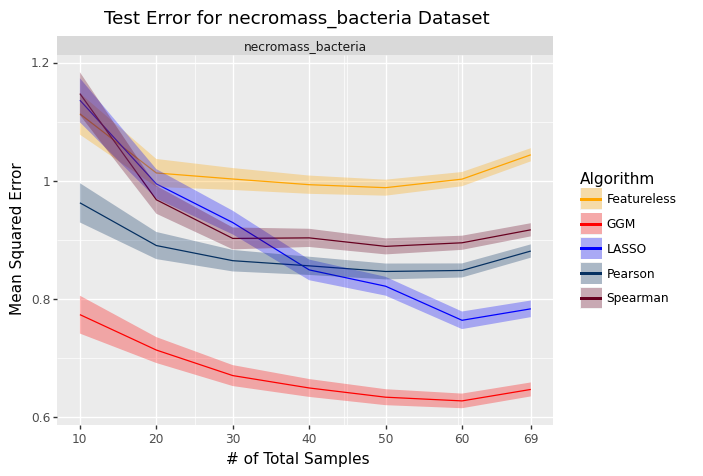

/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: necromass_bacteria_updated_graph.png


In [6]:
# date_time = "2023-03-06_17:34"
# date_time = "2023-03-22_17:46"
# date_time = "2023-03-22_18:45"
# date_time = "2023-03-22_19:15"
# date_time = "2023-04-03_18:15"
# date_time = "2023-04-03_18:31"
date_time = "2023-03-22_18:12"
date_time = "2023-03-22_19:01"
date_time = "2023-04-10_11:18"
date_time = "2023-04-10_12:28"

# date_time = "2023-04-10_17:47"
date_time = "2023-04-10_15:31"
date_time = "2023-05-29_12:40"
date_time = "2023-06-21_17:26"
date_time = "2023-06-21_19:01"
date_time = "2023-06-28_13:01"
# date_time = "2023-07-19_20:27"
date_time = "2023-07-20_16:36"
date_time = "2023-07-20_16:44"


error_df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")
# error_df.loc[error_df['Algorithm'] == 'GuassianGraphicalMethod', 'Algorithm'] = 'GaussianGraphicalModel'

# error_df.to_csv(f"{root_results_dir}/{date_time}_results.csv", index=False)
# filter when `# of Total Samples` is 20, 40, 60, 80, 100
# error_df = error_df[error_df["# of Total Samples"].isin([20, 40, 60, 80, 100])]

test_error_graph(error_df)
